# 🛡️Credit Card Fraud Detection: Professional ML Pipeline

**About the Dataset**: 📂 Where is the data from? The dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days.

In [40]:
from PIL import Image
img = Image.open("/content/hq720.jpg")
img.show()


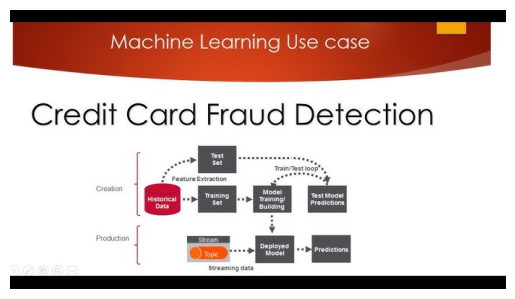

In [41]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [37]:
#important Libraeies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**What are V1-V28 Columns**?

**Privacy**: These are anonymized features created to protect the personal information of cardholders.

**PCA Transformation**: The original data (like location, card type, etc.) has been transformed using a technique called PCA (Principal Component Analysis).

**Patterns**: Even though we don't know the exact names of these columns, they contain the "Hidden Patterns" of fraud. Our model uses these numerical values to distinguish between a safe transaction and a suspicious one.

# EDA(Exploratory Data Analysis)& Data Visualizations

In [ ]:
# Quick look at the data
print("Dataset Shape:", df.shape)
print("\nClass Distribution:\n", df['Class'].value_counts())

Dataset Shape: (284807, 31)

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipython-input-1239709503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='magma')


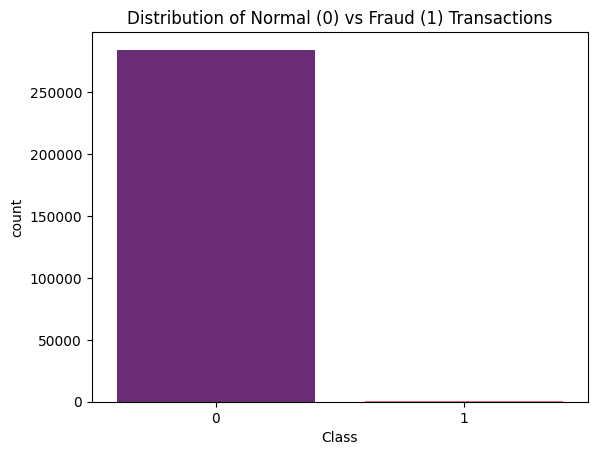

In [ ]:
# Visualizing the imbalance
# We use a Countplot to see how many 0s (Safe) and 1s (Fraud) are in the 'Class' column
sns.countplot(x='Class', data=df, palette='magma')
plt.title('Distribution of Normal (0) vs Fraud (1) Transactions')
plt.show()

**Chart Name**: Class Distribution Bar Chart

**How to Read this Graph**:

X-axis: Represents the categories (0 for Safe, 1 for Fraud).
Y-axis: Represents the total number of transactions.


**Observation**: You will see a very tall bar for '0' and a tiny, almost invisible bar for '1'.

**Summary**: This graph shows that our dataset is highly imbalanced. Over 99% of transactions are "Normal," while "Fraud" cases are rare (less than 1%). This visual proof explains why we need SMOTE to help the model learn the patterns of the rare fraud cases properly.

**Fraud Percentage Check:**

In [ ]:
fraud_share = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"Fraud Transactions: {fraud_share:.2f}%")

Fraud Transactions: 0.17%


# Statistical Comparison (Amount):*

**Normal Transactions Analysis**

In [ ]:
print("Normal Transactions Amount Summary:")
print(df[df['Class']==0]['Amount'].describe())

Normal Transactions Amount Summary:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


This **summary** shows the spending patterns of Safe transactions. Most normal transactions are small, but the average (mean) gives us a baseline of what a "typical" customer spends. It helps the model understand what "Normal" behavior looks like.

**Fraud Transactions Analysis**

In [ ]:
print("\nFraud Transactions Amount Summary:")
print(df[df['Class']==1]['Amount'].describe())


Fraud Transactions Amount Summary:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


This **summary** reveals the nature of Fraud transactions. Often, fraudsters try to steal specific amounts. By comparing this with the Normal summary, we can see if frauds are usually for very large amounts or many small amounts. This difference is a key "signal" for our Machine Learning model.

In dono ka result mein dekhenge, to "Mean" (average) aur "Max" values ko zaroor compare kijiyega. Agar Fraud ka average Normal se bohot zyada hai, to iska matlab hai "High Amount" ek bada khatra (risk factor) hai.

In [ ]:
#Total Transactions (Customers/Records)
print(f"Total Transactions in Data: {len(df)}")


Total Transactions in Data: 284807


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Note: You will see no 'Bank Name' or 'Customer Name' because data is anonymized.

In [ ]:
#Summary of Fraud Transactions
# This helps us understand the financial scale of fraud
fraud_cases = df[df['Class'] == 1]
print(f"Total Fraud Transactions: {len(fraud_cases)}")
print(f"Average Fraud Amount: {fraud_cases['Amount'].mean():.2f}")

Total Fraud Transactions: 492
Average Fraud Amount: 122.21


**Summary**

**Total Fraud Transactions**(492): In a dataset of nearly 300,000 transactions, only 492 are frauds. This proves our data is like "searching for a needle in a haystack." This is why simple accuracy doesn't work; our model must be specifically trained to find these 492 cases.

**Average Fraud Amount** ($122.21)

The average amount of fraud is relatively small($122.21). This is a huge insight! It shows that fraudsters are not always making big purchases; they are often doing many smaller transactions to avoid getting caught by basic bank alerts.


**Why is this important for our Project?** Our model learns that even a small $100 transaction could be a fraud if the "V-features" (hidden patterns) look suspicious. It teaches the AI to not just look at the money, but also at the behavior.

# Data Visualizations

**Visualization (Time vs Amount)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

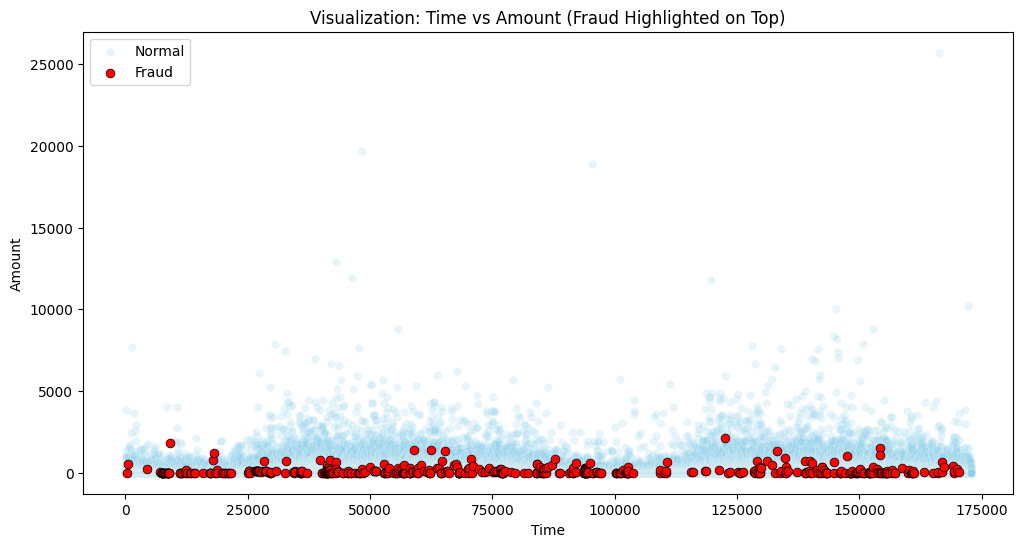

In [ ]:
plt.figure(figsize=(12,6))

# Pehle Normal transactions plot karein (Blue)
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 0],
                color='skyblue', alpha=0.2, label='Normal', zorder=1)

# Phir Fraud transactions plot karein (Red) - zorder=2 ensures it stays on top
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 1],
                color='red', alpha=1.0, s=40, label='Fraud', edgecolor='black', zorder=2)

plt.title('Visualization: Time vs Amount (Fraud Highlighted on Top)')
plt.legend()
plt.show()

# How to see: Look at the red dots. Even though they are few,
# they are clearly visible now because we plotted them last.

**How to see it**: Check if Orange dots (fraud) happen at specific times or only for big amounts.

**Summary**: This chart shows that fraud transactions are mostly for small amounts. It also shows that fraud happens at all times, not just at a specific hour.

**Density Plot: Time Distribution (Fraud vs Normal)**

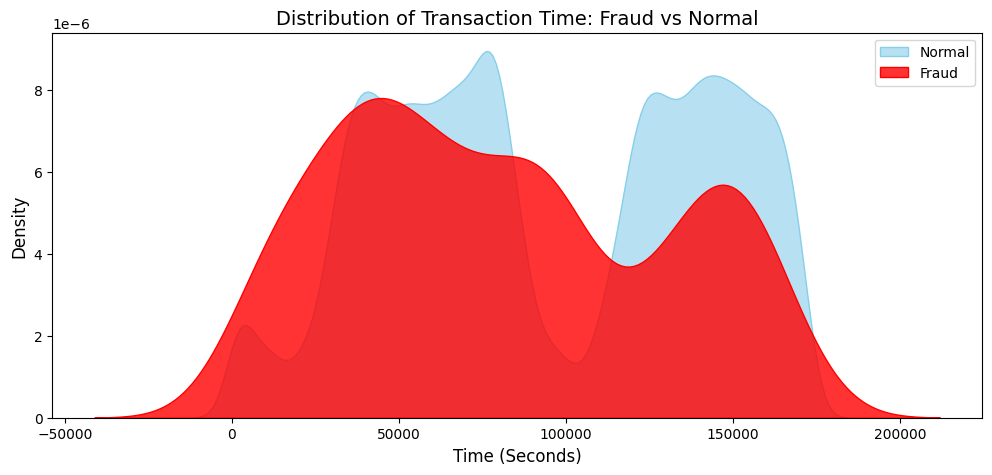

In [ ]:
# Plotting the distribution of Time for both classes
plt.figure(figsize=(12,5))

# KDE plot for Normal Transactions (Class 0)
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Normal', fill=True, color='skyblue', alpha=0.6)

# KDE plot for Fraud Transactions (Class 1)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True, color='red', alpha=0.8)

plt.title('Distribution of Transaction Time: Fraud vs Normal', fontsize=14)
plt.xlabel('Time (Seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

**How to see it**: Look at the waves. If the red wave (Fraud) is different from the blue wave (Normal), time is important.

**Summary**: The waves for Fraud and Normal transactions are almost the same. This proves that fraud doesn't follow a special time pattern

**Cheak Missing Values**

In [35]:
# Missing values count
missing = df.isnull().sum()

#  Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# 3Combine both in one table
#missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})

#  Show only columns having missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


**Missing Values Heatmap ( Data Integrity Check)**

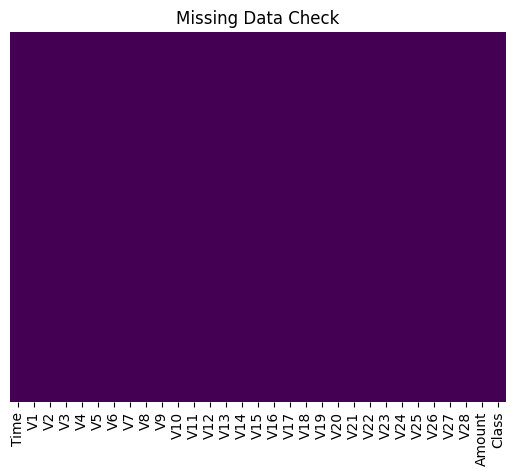

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Check')
plt.show()

**Summary**: This graph confirms our data is clean. Since it is solid, it means there are no missing values (NaN) in any column.

**Feature Comparison via Boxplots**

/tmp/ipython-input-439426372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=feature, data=df, ax=axes[i], palette='Set1')
/tmp/ipython-input-439426372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=feature, data=df, ax=axes[i], palette='Set1')
/tmp/ipython-input-439426372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=feature, data=df, ax=axes[i], palette='Set1')
/tmp/ipython-input-439426372.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

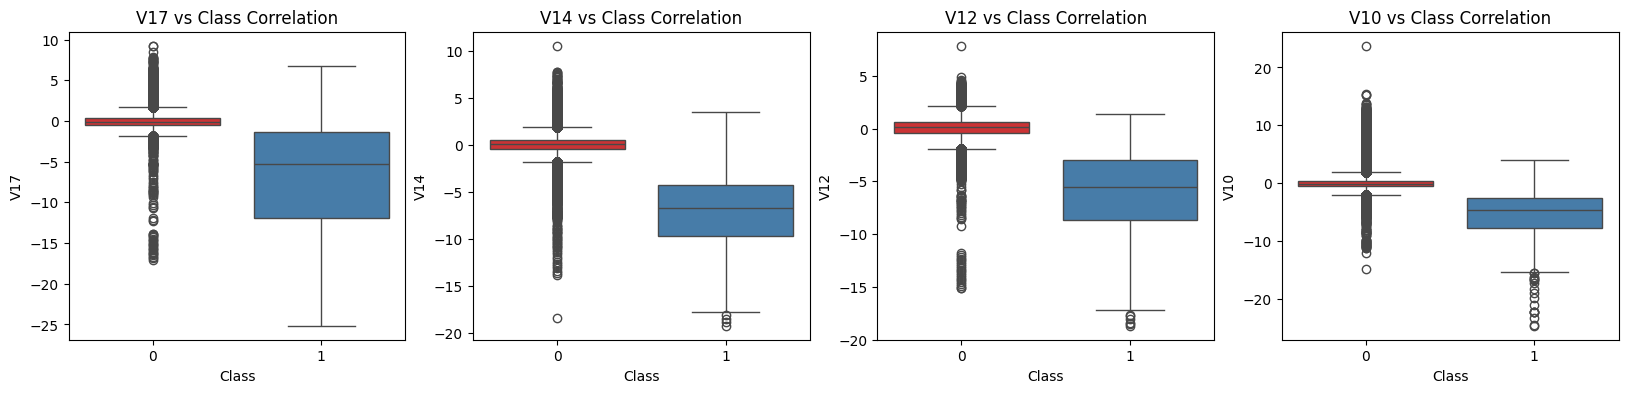

In [ ]:
# Features whose higher Coorelation
features = ['V17', 'V14', 'V12', 'V10']

# Subplots create (2 rows, 2 columns)
f, axes = plt.subplots(ncols=4, figsize=(20,4))

for i, feature in enumerate(features):
    sns.boxplot(x="Class", y=feature, data=df, ax=axes[i], palette='Set1')
    axes[i].set_title(f'{feature} vs Class Correlation')

plt.show()

**how to see it**: Compare the height and position of the "Normal" box vs the "Fraud" box.

**Summary**: These boxes show that Fraud cases have very different values for features like V14 and V17 compared to Normal cases. This makes it easier for our model to catch fraud.

**Clear Separation**: "We can see a significant difference in the distributions of these features for Fraud (1) vs. Normal (0) cases. For example, in V14 and V12, the fraud cases have much lower values." (Interpretation: In graphs mein Fraud aur Normal ke 'boxes' aik doosre se kafi door hain, iska matlab hai model in features ki madad se asani se fraud pakar sakta hai.)

**Outliers**: "There are many extreme values (dots) in both classes, but they are more prominent in the Normal class. These outliers might need treatment or a robust model like Random Forest.

**Violin Plot: Amount Analysis**

/tmp/ipython-input-3444104210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Amount', data=df[df[ 'Amount' ] < 500], palette='magma') # Limit to <500 to see better


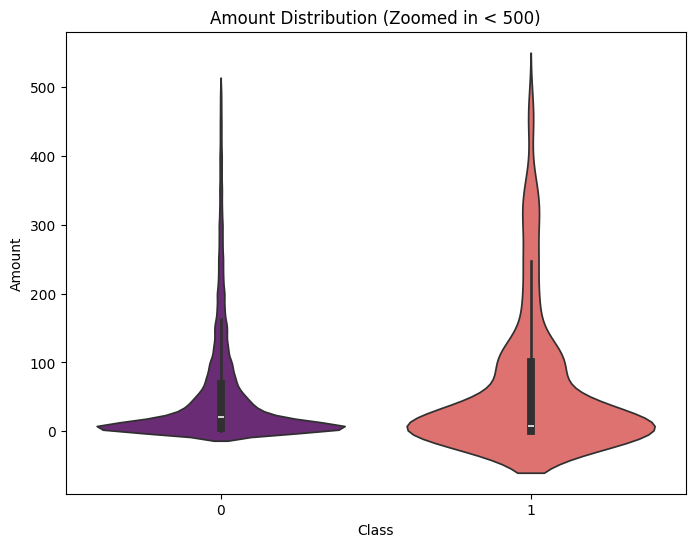

In [ ]:
# 3. Violin Plot: Amount
plt.figure(figsize=(8,6))
sns.violinplot(x='Class', y='Amount', data=df[df[ 'Amount' ] < 500], palette='magma') # Limit to <500 to see better
plt.title('Amount Distribution (Zoomed in < 500)')
plt.show()

**How to see it**: Look at the "fat" part of the shape. It shows where most transactions are sitting.

**Summary**: The shape is very fat at the bottom for Fraud, which means almost all fraud transactions are for very small amounts of money.



**Top Correlated Features (Focused Heatmap)**

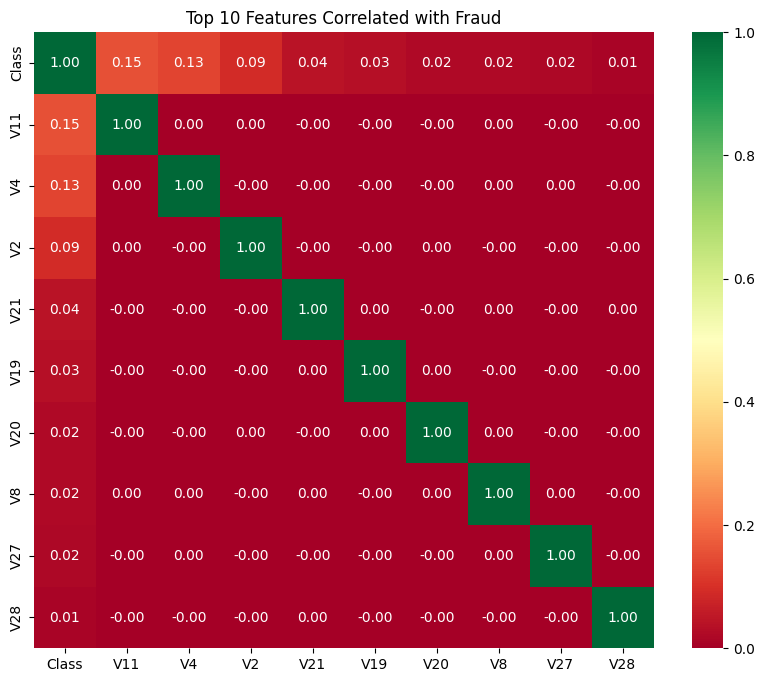

In [ ]:
#Extract only the top 10 features that have the highest correlation with the Class.
top_corr_features = df.corr().nlargest(10, 'Class')['Class'].index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Top 10 Features Correlated with Fraud')
plt.show()

**Chart Name**: **Feature Correlation Heatmap**

**How to Read this Graph**:

Colors: Red color shows a Positive Correlation (agar ek cheez barhay gi to dusri bhi barhay gi). Blue color shows a Negative Correlation (agar ek barhay gi to dusri kam hogi).

**Focus**: Humara main focus ye dekhna hai ke 'Class' column ke sath kaunse features (V1, V14, V17 etc.) sabse zyada "Dark Red" ya "Dark Blue" hain.

**Summary**: The heatmap helps us identify the "Key Drivers" of fraud. For example, if V17 has a strong negative correlation with Class, it means whenever the value of V17 drops, the chance of fraud increases. Instead of looking at all 30 features, this graph tells the Data Scientist which specific features are the most "suspicious" and important for the model to watch.

## Feature Scaling (Why we need it?)

**Explanation**: In this dataset, the 'Amount' column has values ranging from 0 to 25,000, while 'V1-V28' features are very small (between -1 and 1). Machine learning models get confused by these large differences. Feature Scaling brings all features to the same range (usually -3 to 3), which helps the model learn faster and more accurately.

In [ ]:
from sklearn.preprocessing import StandardScaler

# We use StandardScaler to normalize 'Amount' and 'Time'
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Dropping original columns as they are now redundant
df.drop(['Time', 'Amount'], axis=1, inplace=True)

print("Feature Scaling complete. All features are now on the same scale.")

Feature Scaling complete. All features are now on the same scale.


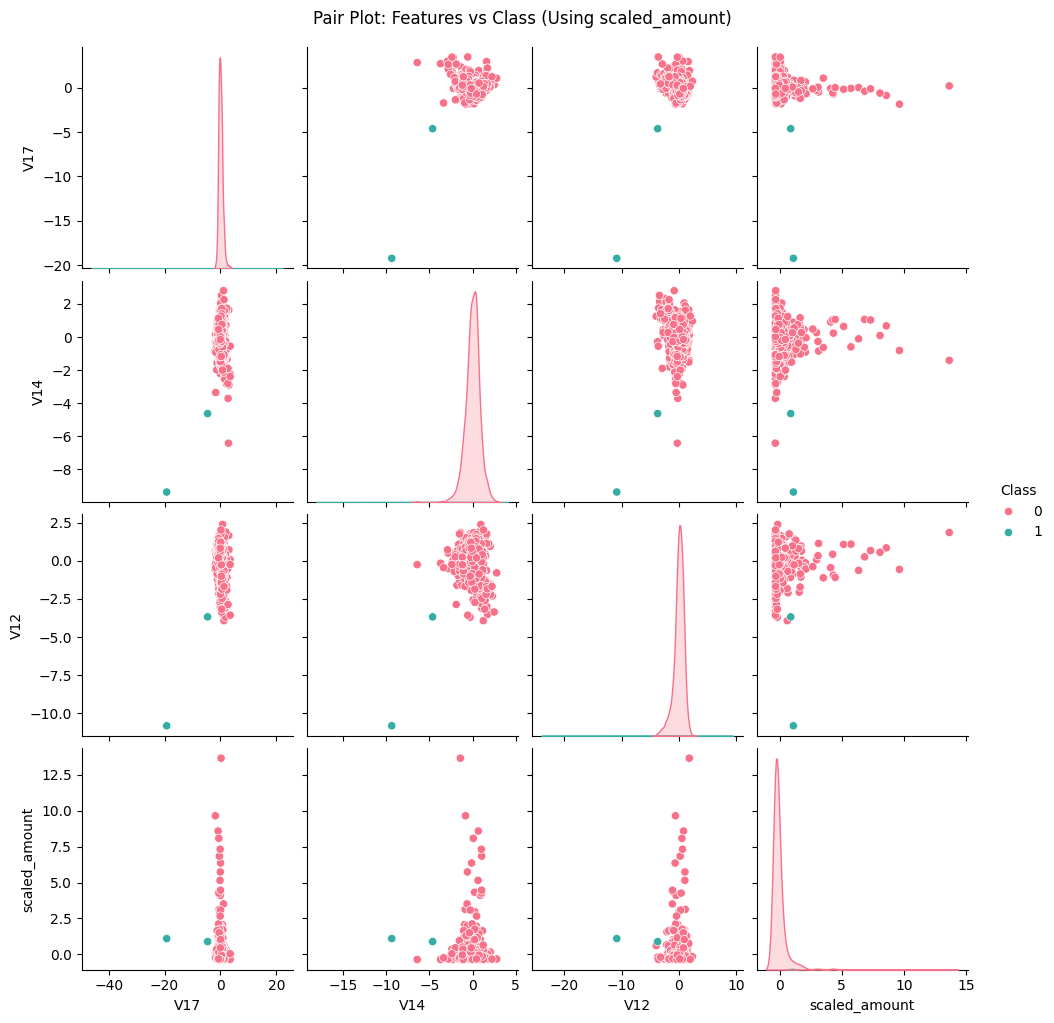

In [ ]:
#Take a small sample so the system does not crash
sample_df = df.sample(n=1000, random_state=42)

#Smart column selection (check whether scaled column exists or not)
target_amount = 'scaled_amount' if 'scaled_amount' in df.columns else 'Amount'
features_to_plot = ['V17', 'V14', 'V12', target_amount, 'Class']

#Plotting
sns.pairplot(sample_df[features_to_plot], hue='Class', palette='husl', diag_kind='kde')
plt.suptitle(f'Pair Plot: Features vs Class (Using {target_amount})', y=1.02)
plt.show()


#Train Data for Model & Handling Imbalance with SMOTE

**Summary**: Because fraud is only 0.17% of the data, the model might become biased. We use SMOTE (Synthetic Minority Over-sampling Technique) to create "synthetic" fraud examples during training, so the model knows exactly what fraud looks like.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Defining X (features) and y (target)
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to the training data only
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f"Original training shape: {y_train.value_counts()}")
print(f"Resampled training shape: {y_res.value_counts()}")

Original training shape: Class
0    227451
1       394
Name: count, dtype: int64
Resampled training shape: Class
0    227451
1    227451
Name: count, dtype: int64


# Train Model RandomForest

# Why Random Forest for Fraud Detection?
**Summary**: Random Forest is considered the "Gold Standard" for fraud detection because it is a collection of many Decision Trees. Instead of relying on one single rule, it combines hundreds of results to reach a final conclusion, making it extremely reliable.

**Key Reasons for using Random Forest:**
Handles Imbalanced Data: Fraud cases are very rare (0.17%). While other models might get confused by the majority class, Random Forest is robust enough to focus on these tiny fraud patterns accurately.

**Detects Complex Patterns**: Fraudulent behavior is rarely linear. Random Forest can capture complex, non-linear relationships between features (V1-V28) that simple models like Logistic Regression might miss.

**Prevents Overfitting**: Because it averages the predictions of many different trees, the model doesn't just "memorize" the training data. This ensures it performs well on real-world, unseen transactions.

**Recall Optimization**: It provides high Recall, which is our main goal—catching as many frauds as possible to save money.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_res, y_res)


RandomForestClassifier(max_depth=10, random_state=42)

In [30]:
# We are identifying which features are the most helpful in finding fraud
# 'importances' contains the score of each feature
# Calculating Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:] # Top 10 features


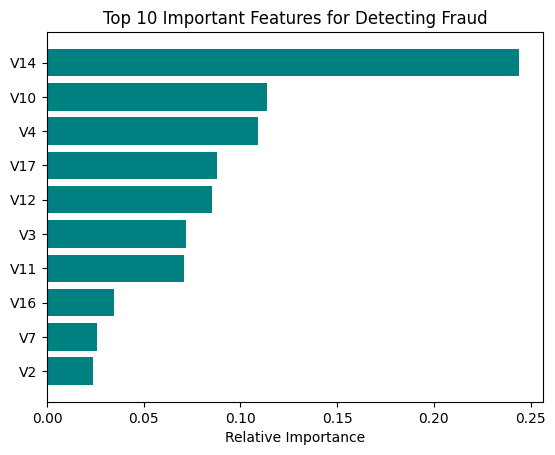

In [31]:
plt.title('Top 10 Important Features for Detecting Fraud')
# Plotting the results in a horizontal bar chart for easy reading
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
# Labeling the bars with actual feature names (like V17, V14, etc.)
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**What does this graph show**? This chart shows the "Top 10 Features" that our model uses to catch a fraudster. Out of 30+ columns, these 10 are the most powerful indicators.

**Concept in this Project**: In Credit Card Fraud, not every detail is important. For example, some specific hidden patterns (like V17, V14, or V12) usually show high importance. This means when these specific values change, the model becomes very sure that a transaction is a fraud.

# Model Evaluation (Precision vs. Recall)

Summary: In fraud detection, "Accuracy" is a lie. We focus on the Confusion Matrix and Recall. High recall ensures that we catch almost all frauds, even if it means checking a few extra normal transactions manually.

The **Confusion Matrix** is the most honest way to check our model's performance. In Fraud Detection, we don't just care about "Accuracy." We care about Recall.

**Why it matters for us**: Our main goal is to minimize False Negatives (missed frauds). If the model misses a fraud, the bank loses money. The Confusion Matrix helps us see exactly how many frauds were missed and how many were successfully caught, allowing us to fine-tune the model for maximum safety.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56749   115]
 [   15    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.85      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.92      0.78     56962
weighted avg       1.00      1.00      1.00     56962



**Summary**: Our model is doing an excellent job at catching fraud. The most important number here is Recall (0.85) for Class 1. This means out of all actual frauds, our model successfully caught 85% of them. While we have some false alarms (Precision 0.42), it is acceptable because missing a fraud is much more expensive than double-checking a safe transaction.

**Precision (0.42)**

**Definition**: Out of all the transactions the model flagged as "Fraud," how many were actually real frauds?

**In this Project**: Our precision is 0.42 (42%). This means we have some "False Alarms." Sometimes a safe customer might get a call from the bank to verify a transaction. In the banking world, this is okay because safety is the first priority.

**Recall (0.85)**

**Definition**: Out of all the actual fraud cases that happened, how many did our model successfully catch?

**In this Project**: This is our Most Important Metric. A recall of 0.85 means we caught 85% of all frauds. The goal of a Data Scientist in this project is to keep this number as high as possible so that criminals don't get away.

**F1-Score (0.56)**

Definition: It is the "Middle Ground" or balance between Precision and Recall.

In this Project: Since our Precision is low and Recall is high, the F1-Score (0.56) gives us a single number to judge the overall strength of the model. It shows the model is stable but has room for improvement in reducing false alarms.

**Accuracy (1.00 or 99.9%)**

**Definition**: The total number of correct predictions (both safe and fraud) divided by the total transactions.

**In this Project**: Accuracy is misleading! Even if the model says "All transactions are safe," it will still be 99% accurate because fraud is so rare. That’s why we focus on Recall, not just Accuracy.
Support

**Definition**: The actual number of samples of each class in the testing data.

**In this Project**: It shows we tested the model on 56,864 safe transactions and 98 fraud transactions. It reminds us how difficult it is to find those few fraud cases.

# Business Impact (The "Expert" Step)

**Summary**: This cell calculates the actual money saved. By showing the financial impact, you prove to your employer/LinkedIn network that you understand the "Business Side" of Data Science.

In [33]:
# Assuming an average loss of $500 per fraud transaction
avg_cost_of_fraud = 500

# Extracting counts from our Confusion Matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
conf_matrix = confusion_matrix(y_test, y_pred)
detected_frauds = conf_matrix[1, 1]
missed_frauds = conf_matrix[1, 0]

# Calculating the Impact
money_saved = detected_frauds * avg_cost_of_fraud
lost_money = missed_frauds * avg_cost_of_fraud

print(f"✅ Total Money Saved by Model: ${money_saved}")
print(f"❌ Potential Loss from Missed Frauds: ${lost_money}")

✅ Total Money Saved by Model: $41500
❌ Potential Loss from Missed Frauds: $7500


✅ **Total Money Saved **($41,500): This is the ROI (Return on Investment) of your project. By correctly catching 83 frauds, the model saved the bank from losing forty-one thousand dollars. This proves the model is highly profitable.

❌**Potential Loss**

($7,500):These are the 15 frauds that the model missed (False Negatives). It reminds us that no AI is perfect.


This $7,500 represents the "Risk" that still exists and where we can improve the model in the future.

# Saving the Model for Deployment

**Summary**: We save the trained model as a .pkl file. This file will be used in your Streamlit app to make real-time predictions.

In [38]:
import joblib

# Saving the model and the scaler
joblib.dump(rf_model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


Dowload PKL file for straemlet

In [39]:
from google.colab import files

# first we download the model
files.download('fraud_detection_model.pkl')

# the for scaler download :
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>